In [180]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [181]:
sns.set()
sns.set_context("paper", font_scale=1.2)

In [182]:
df = pd.read_csv("matching_scores.csv")
# drop the first column
df = df.drop(df.columns[0], axis=1)

In [183]:
df = df[df['reversed_best'] == False]

In [185]:
df_best = df.sort_values(by='score').groupby('file_name').first()

In [175]:
df_pivot = df.pivot_table(index='file_name', columns='roll', values='score')
df_pivot

roll,-33.557962,-13.126740,-12.126740,-11.867184,-10.867184,-2.057247,7.442038,10.756426,26.873260,27.873260,...,36.942753,99.534223,196.944047,220.873260,268.761791,297.390006,311.132816,315.534223,354.534223,355.646772
file_name,,,,,,,,,,,,,,,,,,,,,
test_images/theta15deg_8steps_45degs/A231212_13241447.png,NaN,NaN,NaN,NaN,NaN,NaN,0.013778,NaN,0.043243,0.042838,...,0.016239,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.037645,NaN
test_images/theta15deg_8steps_45degs/A231212_13250404.png,0.035119,0.014013,0.0139,0.049429,0.047907,0.038161,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.048293,NaN,NaN,0.040799,NaN,NaN
test_images/theta15deg_8steps_45degs/A231212_13255288.png,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.023171,NaN,NaN,...,NaN,0.021672,0.037744,0.030202,NaN,0.049717,0.030313,NaN,NaN,0.033519


In [177]:
# find the lowest score for each file_name and find the roll that corresponds to it
df_best = df_pivot.idxmin(axis=1)
# to frame
df_best = df_best.to_frame()
# rename the column
df_best = df_best.rename(columns={0: 'roll'})

# normalize the roll to minus the first roll
# df_best['roll'] = (df_best['roll'] - df_best['roll'][0]) % 360
# make a true_roll that starts from first roll and decreases by 45 for each row
# true_roll = []
# for i in range(0, 360, 45):
#     true_roll.append((df_best['roll'][0] - i) % 360)
#
# true_roll.append(df_best['roll'][0])
# # add true_roll to df_best
# df_best['true_roll'] = true_roll

In [152]:
# only show test_images/theta15deg_8steps_45degs/A231212_13250404.png in pivot
df_pivot[df_pivot.index.str.contains('A231212_13250404.png')]

roll,1,11,22,24,38,39,60,70,71,72,...,261,262,266,291,292,306,325,326,343,349
file_name,,,,,,,,,,,,,,,,,,,,,
test_images/theta15deg_8steps_45degs/A231212_13250404.png,NaN,NaN,NaN,NaN,0.049429,0.047907,0.035119,NaN,NaN,0.014013,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [178]:
df_best

,roll
file_name,
test_images/theta15deg_8steps_45degs/A231212_13241447.png,7.442038
test_images/theta15deg_8steps_45degs/A231212_13250404.png,-12.126740
test_images/theta15deg_8steps_45degs/A231212_13255288.png,99.534223


In [186]:
df_best

,rotation,max_val,rotation_reverse,max_val_reverse,score,reversed_diff,reversed_best,roll,pitch,yaw,roll_reverse,pitch_reverse,yaw_reverse
file_name,,,,,,,,,,,,,
test_images/theta15deg_8steps_45degs/A231212_13241447.png,"roll: 101.00, pitch/theta/X: 282.68, yaw/phi/Y...",101.163658,"roll: 116.00, pitch/theta/X: 101.43, yaw/phi/Y...",100.374243,0.013778,-0.789415,False,101,282.679,-68.85,116,101.429,76.05
test_images/theta15deg_8steps_45degs/A231212_13250404.png,"roll: 73.00, pitch/theta/X: 270.28, yaw/phi/Y:...",135.987177,"roll: 241.00, pitch/theta/X: 93.77, yaw/phi/Y:...",135.433443,0.013900,-0.553733,False,73,270.280,-57.15,241,93.766,57.15
test_images/theta15deg_8steps_45degs/A231212_13255288.png,"roll: 343.00, pitch/theta/X: 322.80, yaw/phi/Y...",114.899493,"roll: 260.00, pitch/theta/X: 146.29, yaw/phi/Y...",114.377271,0.021672,-0.522222,False,343,322.803,-54.45,260,146.289,59.85
test_images/theta15deg_8steps_45degs/A231212_13264499.png,"roll: 24.00, pitch/theta/X: 323.92, yaw/phi/Y:...",129.754341,"roll: 281.00, pitch/theta/X: 145.17,\nyaw/phi/...",130.446575,0.049035,0.692234,False,24,323.921,75.15,281,145.171,-69.75
test_images/theta15deg_8steps_45degs/A231212_13274511.png,"roll: 240.00, pitch/theta/X: 243.67, yaw/phi/Y...",83.486264,"roll: 346.00, pitch/theta/X: 67.85, yaw/phi/Y:...",82.867018,0.041570,-0.619245,False,240,243.672,46.35,346,67.849,-49.05
test_images/theta15deg_8steps_45degs/A231212_13283379.png,"roll: 155.00, pitch/theta/X: 305.67, yaw/phi/Y...",62.395981,"roll: 137.00, pitch/theta/X: 123.30, yaw/phi/Y...",61.380075,0.040509,-1.015906,False,155,305.668,-12.15,137,123.300,3.15
test_images/theta15deg_8steps_45degs/A231212_13291276.png,"roll: 325.00, pitch/theta/X: 145.17, yaw/phi/Y...",128.352427,"roll: 67.00, pitch/theta/X: 323.92, yaw/phi/Y:...",126.613478,0.011599,-1.738949,False,325,145.171,-69.75,67,323.921,75.15
test_images/theta15deg_8steps_45degs/A231212_13300399.png,"roll: 156.00, pitch/theta/X: 270.28, yaw/phi/Y...",140.398150,"roll: 325.00, pitch/theta/X: 93.77, yaw/phi/Y:...",139.306168,0.006096,-1.091981,False,156,270.280,-57.15,325,93.766,57.15
test_images/theta15deg_8steps_45degs/A231212_13304211.png,"roll: 101.00, pitch/theta/X: 282.68, yaw/phi/Y...",101.847164,"roll: 120.00, pitch/theta/X: 101.43, yaw/phi/Y...",101.063979,0.036099,-0.783185,False,101,282.679,-68.85,120,101.429,76.05


/Users/mikkel/repos/RRTNCTTASA/python-version/.venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/mikkel/repos/RRTNCTTASA/python-version/.venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/mikkel/repos/RRTNCTTASA/python-version/.venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


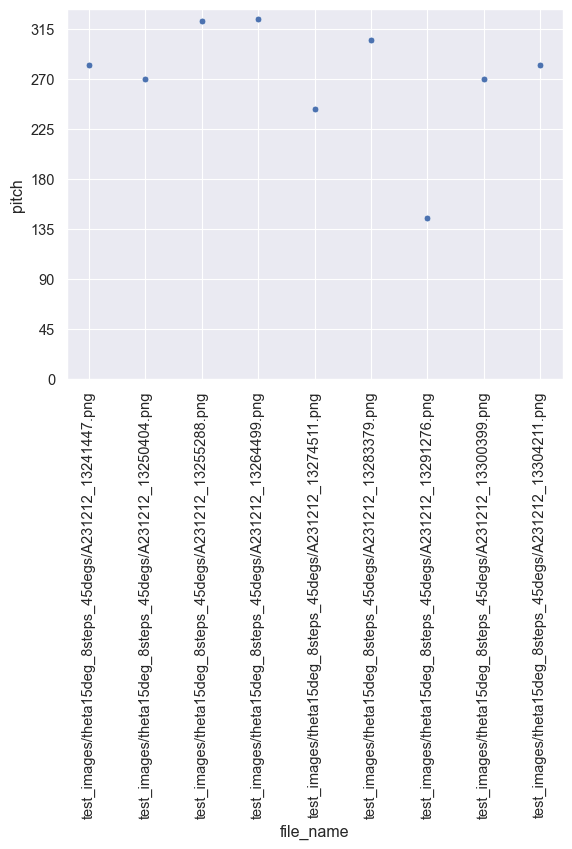

In [189]:
# plot roll and hue being score sorted by file_name
sns.scatterplot(data=df_best, x='file_name', y='pitch');
# rotate x labels
plt.xticks(rotation=90);
# y ticks every 45
plt.yticks(range(0, 360, 45));